In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmaps as cmap
from scipy.stats import pearsonr
import pandas as pd 
import cartopy, cartopy.crs as ccrs  # Plot maps
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

In [2]:


def makeMap(ax, interval, labelsize):
    ax.set_frame_on(False)
    ax.set_extent([0, 359, -10, 60], crs = ccrs.PlateCarree(central_longitude=180))

    
    # Add state boundaries to plot
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth = 0.5)
    ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth = 0.5)
    ax.set_xticks(np.arange(-180, 181, interval), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, interval), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
    ax.tick_params(axis='both', labelsize=labelsize, left = False, bottom = False)
    ax.grid(linestyle = '--', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)

    # ax.set_extent([0, 359, -10, 60], crs = ccrs.PlateCarree(central_longitude=180))


    return ax 

def percentile(data, num):
    num = int(num / 100 * len(data))
    data = sorted(data)

    if num % 2 == 0:
        return ((data[num] + data[num - 1]) / 2)
    else:
        return data[num]


In [47]:
dataset = xr.open_dataset(r"C:\Users\deela\Downloads\SHEARS_1987-2023.nc")
print(list(dataset.variables))
dataset = dataset
dataset = dataset.where(dataset.system_type.isin(['TD', 'TS', 'HU', 'TY', 'ST', 'TC']), drop=True)
dataset = dataset.where(dataset.landfall == False, drop=True)
dataset = dataset.where(dataset.dist_land >= 0, drop=True)
# dataset = dataset.where(dataset.rlhum.sel(upper = slice(300, 700)).mean('upper') > 40, drop = True)
# dataset = dataset.where(dataset.sst > 26, drop=True)
# dataset = dataset.where(dataset.lats > 0, drop = True)
dataset = dataset.where(dataset.vmax > 100, drop = True)
# dataset = dataset.where(dataset.bdelta_vmax >= 0, drop = True)
dataset = dataset.where(dataset.fdelta_vmax >= 30, drop = True)
# dataset = dataset.where(dataset.time > np.datetime64('2020-01-01T00'), drop = True)
# dataset = dataset.where(dataset.atcf.astype(str).str.startswith('AL'), drop = True)
print(dataset['time'].values)
pres = dataset.upper

print(dataset)
print(dataset['sh_mag'])


['sh_mag', 'u_shrs', 'v_shrs', 'rlhum', 'u_data', 'v_data', 'temperature', 'divergence', 'sst', 'mpi', 'lons', 'lats', 'dist_land', 'landfall', 'time', 'vmax', 'mslp', 'fdelta_vmax', 'bdelta_vmax', 'system_type', 'uspd', 'vspd', 'atcf', 'case', 'upper', 'lower']
['1987-09-12T12:00:00.000000000' '1988-09-12T18:00:00.000000000'
 '1988-09-13T00:00:00.000000000' '1988-09-13T06:00:00.000000000'
 '1990-07-22T12:00:00.000000000' '1990-10-19T12:00:00.000000000'
 '1992-03-08T00:00:00.000000000' '1997-09-09T06:00:00.000000000'
 '1998-10-25T06:00:00.000000000' '1998-10-25T12:00:00.000000000'
 '1998-10-25T18:00:00.000000000' '1999-09-12T12:00:00.000000000'
 '2000-05-08T18:00:00.000000000' '2000-08-20T18:00:00.000000000'
 '2001-12-21T12:00:00.000000000' '2001-12-21T18:00:00.000000000'
 '2002-10-24T06:00:00.000000000' '2002-07-12T06:00:00.000000000'
 '2003-09-09T06:00:00.000000000' '2002-12-27T06:00:00.000000000'
 '2003-04-03T12:00:00.000000000' '2004-06-15T12:00:00.000000000'
 '2004-08-22T06:00:00.

In [48]:
test = dataset['sh_mag'].sel(upper = 500, lower = 850)

In [49]:
print(np.nanmean(test.values) * 1.94384, np.nanmax(test.values) * 1.94384)
t = test.values * 1.94384

6.85434659863009 16.7385472467041


In [50]:
for x in range(len(test.values)):
    print(test.values[x] * 1.94384, dataset['atcf'].values[x], dataset['time'].values[x], dataset['lats'].values[x], dataset['lons'].values[x], dataset['vmax'].values[x], dataset['fdelta_vmax'].values[x])

7.7751922319793705 EP131987 1987-09-12T12:00:00.000000000 13.864109 245.72461 105.0 30.0
8.994198377456666 AL081988 1988-09-12T18:00:00.000000000 17.899452 283.1016 110.0 30.0
8.718618548431397 AL081988 1988-09-13T00:00:00.000000000 18.572466 281.48605 110.0 50.0
7.997682287979126 AL081988 1988-09-13T06:00:00.000000000 18.638395 280.21674 115.0 40.0
6.234193373603821 EP091990 1990-07-22T12:00:00.000000000 15.017849 245.82901 105.0 30.0
1.4312131109142303 EP231990 1990-10-19T12:00:00.000000000 13.710277 252.69775 105.0 30.0
10.032806629104615 SH251992 1992-03-08T00:00:00.000000000 -15.913371 174.74019 105.0 30.0
4.759959699172974 CP021997 1997-09-09T06:00:00.000000000 17.96538 155.79343 105.0 35.0
3.2517316819763185 AL131998 1998-10-25T06:00:00.000000000 16.168842 281.18384 105.0 30.0
1.9808490692138672 AL131998 1998-10-25T12:00:00.000000000 16.168842 280.8047 115.0 30.0
3.6260552725028994 AL131998 1998-10-25T18:00:00.000000000 16.479252 279.71118 125.0 30.0
6.0446711240005495 AL081999 

01%: 0.0
05%: 0.0
10%: 0.0
25%: 0.0
33%: 0.0
50%: 5.0
66%: 5.0
75%: 10.0
90%: 15.0
95%: 20.0
99%: 25.0

Mean: 5.909090995788574
Median: 5.0
Max: 30.0
Min: 0.0
Range: 30.0


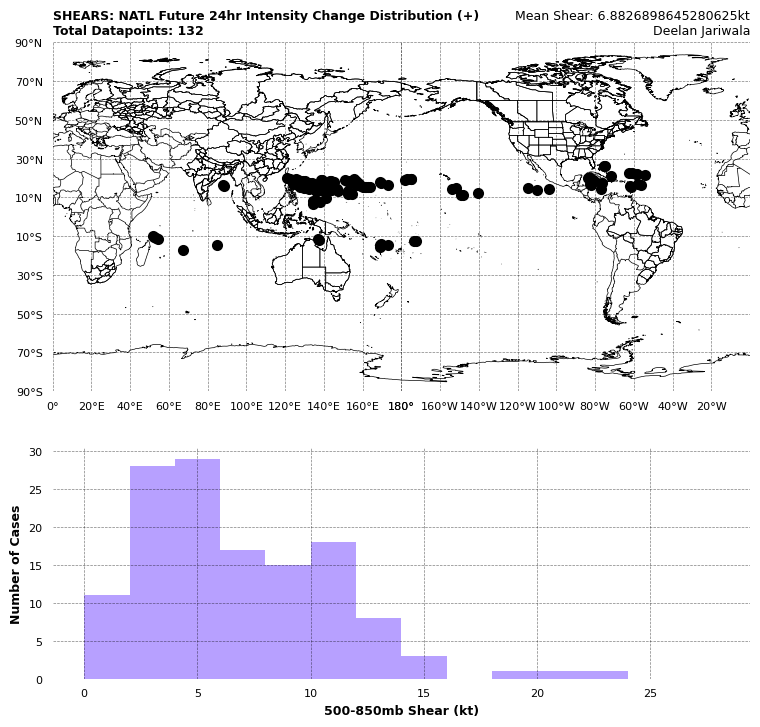

In [32]:
fig = plt.figure(figsize=(9, 12))
gs = fig.add_gridspec(4, 1, wspace = 0, hspace = 0)
axes = [fig.add_subplot(gs[2:3, 0]),
        fig.add_subplot(gs[0:2, 0], projection = ccrs.PlateCarree(central_longitude=180))]
axes[1] = makeMap(axes[1], 20, 8)
axes[1].scatter(dataset['lons'], dataset['lats'], c = 'black', linewidth = 2, transform = ccrs.PlateCarree(central_longitude = 0))

# Add the map and set the extent
axes[0].set_frame_on(False)
axes[0].tick_params(axis='both', labelsize=8, left = False, bottom = False)
axes[0].grid(linestyle = '--', alpha = 0.5, color = 'black', linewidth = 0.5, zorder = 9)
axes[0].set_ylabel('Number of Cases', weight = 'bold', size = 9)
axes[0].set_xlabel('500-850mb Shear (kt)', weight = 'bold', size = 9)

plt.title(f'SHEARS: NATL Future 24hr Intensity Change Distribution (+)\nTotal Datapoints: {len(dataset["fdelta_vmax"])}' , fontweight='bold', fontsize=9, loc='left')
plt.title(f'Mean Shear: {np.nanmean(t)}kt\nDeelan Jariwala', fontsize = 9, loc='right')  
axes[0].hist(t, bins = np.arange(0, 30, 2), color = '#9f80ff', alpha = 0.75)
plt.savefig(r"C:\Users\deela\Downloads\shearthingyforcam.png", dpi = 400, bbox_inches = 'tight')

wind = np.nan_to_num(dataset['fdelta_vmax'].values)
print(f"01%: {percentile(wind, 1)}\n05%: {percentile(wind, 5)}\n10%: {percentile(wind, 10)}\n25%: {percentile(wind, 25)}\n33%: {percentile(wind, 33)}\n50%: {percentile(wind, 50)}\n66%: {percentile(wind, 66)}\n75%: {percentile(wind, 75)}\n90%: {percentile(wind, 90)}\n95%: {percentile(wind, 95)}\n99%: {percentile(wind, 99)}\n")
print(f"Mean: {np.nanmean(wind)}\nMedian: {np.nanmedian(wind)}\nMax: {np.nanmax(wind)}\nMin: {np.nanmin(wind)}\nRange: {np.nanmax(wind) - np.nanmin(wind)}")

plt.show()